### Definicja Problemu

Dla danego obrazu celem jest znalezienie ciągu $M$ trójkątów o dowolnych kolorach, które po nałożeniu na puste płótno jak najlepiej dopasują się do wejściowego obrazu. Każdy trójkąt ma taki sam współczynnik przezroczystości $\alpha$, który jest parameterem problemu.

$$
\Omega = ((\mathbb{Z} \times \mathbb{Z})^3 \times \{0,1,\dots,255 \}^3)^M
$$

$$
F(\text{triangles}) = \sum_{x=0}^{W-1} \sum_{y=0}^{H-1} \sum_{c \in \{R, G, B\}} \left( I_\text{target}
(x, y, c) - I_\text{painted}(x, y, c; \text{triangles}, \alpha) \right)^2
$$

### Opis Algorytmu 

Algorytm rozwiązuje problem, iteracyjnie zwiększając liczbę trójkątów w rozwiązaniu. Do ustawienia 
nowego trójkąta stosowana jest standardowa strategia ewolucyjna $(\mu + \lambda)$, wykorzystująca jedynie
operatory mutacji. Każda mutacja losowo wybiera trójkąt do modyfikacji, faworyzując
trójkąty, które będą nakładane na końcu. W szczególności ostatni trójkąt jest wyróżniony i ma
$\frac{2}{3}$ szansy na zostanie wybranym.

Podstawową mutacją jest wygenerowanie nowego trójkąta, którego pozycja ustalana jest na podstawie
heurystyki wyliczającej piksele, w otoczeniu których jest potencjał na poprawę. Wierzchołki trójkąta są
wybierane jako małe zaburzenie względem wybranego piksela. Jeśli opłacalne jest postawienie dużego
trójkąta, algorytm najpierw ustawi mały trójkąt, który się w nim zawiera, a następnie go rozszerzy.

Kolejną mutacją jest przesunięcie jednego z wierzchołków w losowym kierunku. Długość przesunięcia może
być albo "mała", w celu poprawy jakości szczegółów, albo "średnia", by umożliwić szersze przeszukiwanie.
Dokładna wartość tych wielkości zależy od etapu w ewolucji.

Ostatnią mutacją, która jest również wykorzystywana przez poprzednie, jest ustawienie koloru trójkąta.
Pierwsza strategia polega na dodaniu małego zaburzenia do obecnego koloru.
Druga strategia losuje próbkę pikseli w danym trójkącie i ustawia kolor jako małe zaburzenie
średniego koloru wylosowanych punktów.



### Implementacja

Kluczową optymalizacją jest wydajne obliczanie funkcji celu dla zmodyfikowanych dzieci. Korzystając z
wartości dopasowania rodzica, wystarczy obliczyć dopasowanie w prostokącie obejmującym starą
i nową wersję zmodyfikowanego trójkąta. Jest to istotna optymalizacja, ponieważ większość trójkątów jest
bardzo mała.

Algorytm oferuje równoległość obliczeń na poziomie tworzenia potomstwa poprzez użycie wielu wątków
lub procesów. Wielowątkowość okazała się nieskuteczna dla większej liczby trójkątów, ponieważ może być
stosowana jedynie w obliczeniach numerycznych, które są przeplatane iteracjami po trójkątach.
Iteracje te zakładają globalny zamek GIL, przez co koszt zmiany kontekstu przewyższa zaoszczędzony
czas. Z kolei, użycie procesów przynosi znaczącą poprawę wydajności programu.

Heurystyka wyznaczania pikseli, w otoczeniu których istnieje potencjał na poprawę, jest obliczana tylko w
momentach zwiększenia liczby trójkątów. W tym procesie uwzględniany jest jedynie obraz namalowany
przez najlepszego osobnika. Zwykle, po fazie ustawienia nowego trójkąta, każdy osobnik
ma go w podobnej lokalizacji, dlatego wyliczone informacje pozostają aktualne dla wszystkich.
W celu poprawy wydajności,  wykorzystałem bibliotekę $\texttt{numba}$, by skompilować tę funkcję do
kodu maszynowego.

Kolejną optymalizacją jest minimalizacja kopiowania obiektów. Trójkąty są współdzielone w pamięci pomiędzy
osobnikami i kopie tworzone są tylko dla pojedyńczych trójkątów, które są poddawane mutacji.

### Wyniki

In [1]:
from IPython.display import Video
import src.generate_visuals as generate_visuals

In [3]:
Video("mona50.mp4")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7501/7501 [00:00<00:00, 476357.00it/s]


[79.69426211 37.99867758 35.53491958 38.95029857 34.29011334 32.03677007
 30.96140169 29.39727055 27.0645133  28.03848781 25.78324009 25.53541749
 26.07847379 25.03609896 23.60005508]


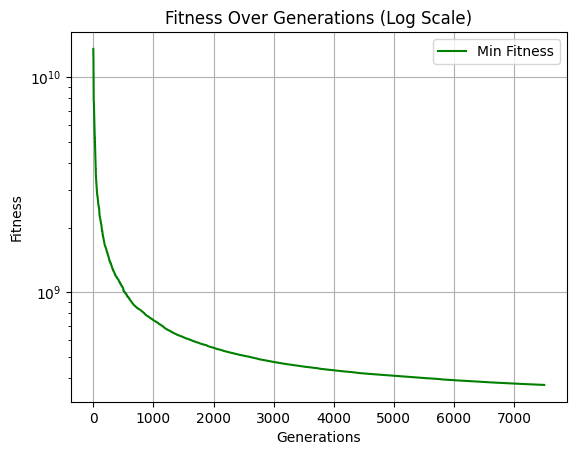

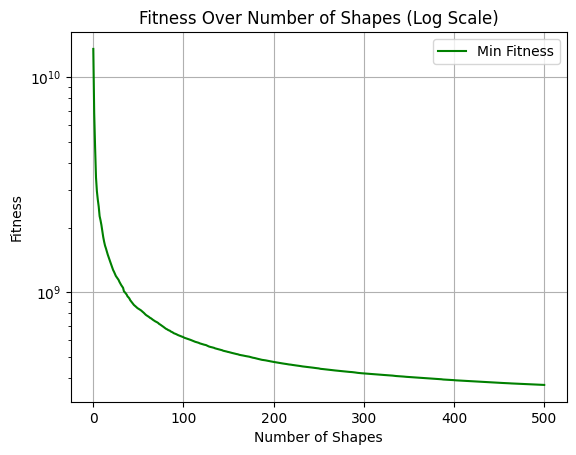

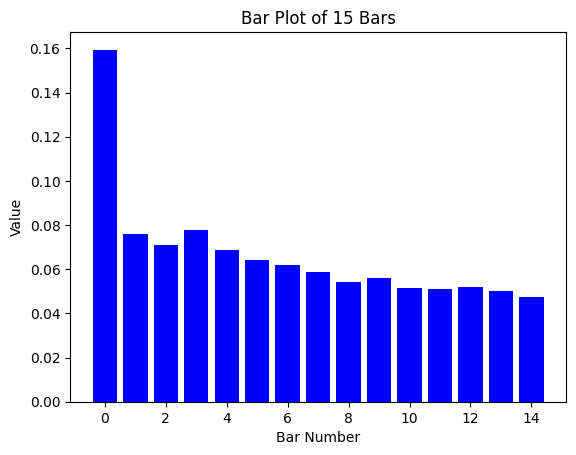

In [2]:
fig1, fig2, fig3 = generate_visuals.create_graphs("images/mona_lisa.jpg", "mona35")